In [1]:
from adsc.models import *

# Sample data to illustrate the interconnected dataclasses
adsc_swot = SWOTAnalysis(
    strengths=["Strong brand recognition", "High-quality services"],
    weaknesses=["Limited global presence", "Dependence on key clients"],
    opportunities=["Expansion into new markets", "Technological advancements"],
    threats=["Rising competition", "Economic downturn"]
)

adsc_vrio = VRIO(
    value="High-value customer service",
    rarity="Unique AI-driven solutions",
    imitability="Difficult due to proprietary technology",
    organization="Well-structured for leveraging resources"
)

adsc_maslow = MaslowsHierarchyPositioning(
    level="Self-Actualization",
    relevance="Highly relevant to companies seeking strategic growth"
)

adsc_financials = Financials(
    revenue=45000000,
    profit_margin=0.12,
    major_customers=["Company A", "Company B"]
)

adsc = Company(
    name="Applied Direct Services Corporation",
    swot=adsc_swot,
    vrio=adsc_vrio,
    maslow_position=adsc_maslow,
)

competitor1_swot = SWOTAnalysis(
    strengths=["Cutting-edge technology", "Global presence"],
    weaknesses=["Limited industry experience", "High employee turnover"],
    opportunities=["New market segments", "Partnership potential"],
    threats=["Rapid technological obsolescence", "Market saturation"]
)

competitor1_vrio = VRIO(
    value="Innovative product offerings",
    rarity="Unique AI algorithms",
    imitability="Difficult due to specialized knowledge",
    organization="Agile and adaptive structure"
)

competitor1_maslow = MaslowsHierarchyPositioning(
    level="Esteem",
    relevance="Attractive for companies looking for innovation"
)

competitor1_financials = Financials(
    revenue=40000000,
    profit_margin=0.1,
    major_customers=["Company X", "Company Y"]
)

competitor1 = Company(
    name="Competitor 1",
    swot=competitor1_swot,
    vrio=competitor1_vrio,
    maslow_position=competitor1_maslow,
)

# Create ADSCAnalysis instance and add competitors
adsc_analysis = ADSCAnalysis()
adsc_analysis.competitors.append(competitor1)
#
# # Print SWOT analysis for ADSC and its competitors
adsc_analysis.print_swots()

SWOT Analysis for Competitor 1:
Strengths: Cutting-edge technology, Global presence
Weaknesses: Limited industry experience, High employee turnover
Opportunities: New market segments, Partnership potential
Threats: Rapid technological obsolescence, Market saturation




In [2]:
import matplotlib.pyplot as plt

# Sample data for SWOT analysis
adsc_swot = {
    'Strengths': 3,
    'Weaknesses': 2,
    'Opportunities': 4,
    'Threats': 1
}

competitor_swot = {
    'Strengths': 4,
    'Weaknesses': 1,
    'Opportunities': 3,
    'Threats': 2
}

# Sample data for VRIO analysis
adsc_vrio = {
    'Value': 4,
    'Rarity': 3,
    'Imitability': 2,
    'Organization': 4
}

competitor_vrio = {
    'Value': 3,
    'Rarity': 4,
    'Imitability': 3,
    'Organization': 2
}

# Sample data for Maslow's Hierarchy positioning
adsc_maslow = {
    'level': 4,
    'relevance': 3
}

competitor_maslow = {
    'level': 3,
    'relevance': 4
}


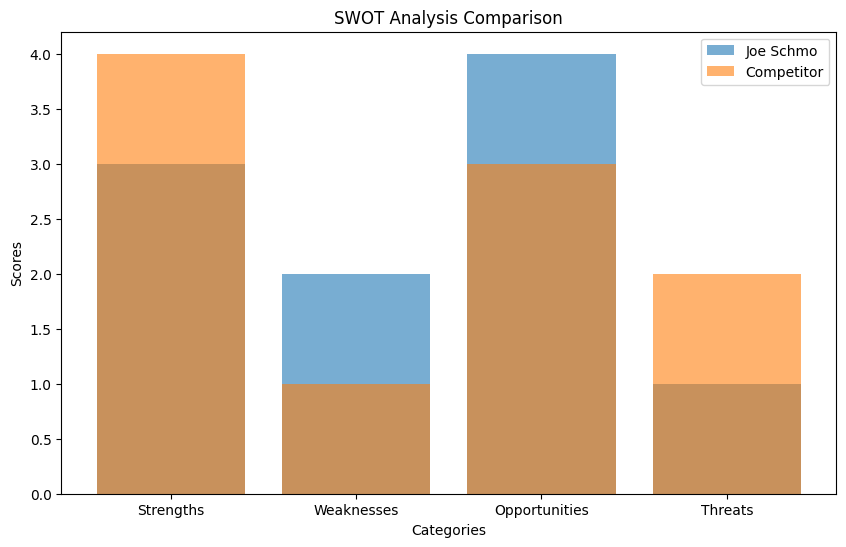

In [11]:
def plot_swot_analysis(adsc_data, competitor_data):
    categories = adsc_data.keys()
    adsc_values = [adsc_data[category] for category in categories]
    competitor_values = [competitor_data[category] for category in categories]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, adsc_values, label='Joe Schmo', alpha=0.6)
    plt.bar(categories, competitor_values, label='Competitor', alpha=0.6)

    plt.xlabel('Categories')
    plt.ylabel('Scores')
    plt.title('SWOT Analysis Comparison')
    plt.legend()
    plt.show()

plot_swot_analysis(adsc_swot, competitor_swot)


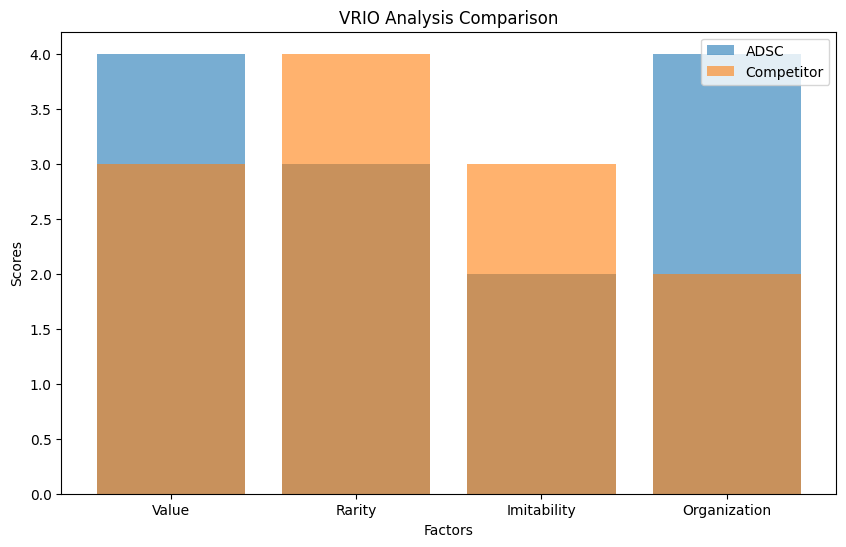

In [12]:
def plot_vrio_analysis(adsc_data, competitor_data):
    factors = adsc_data.keys()
    adsc_values = [adsc_data[factor] for factor in factors]
    competitor_values = [competitor_data[factor] for factor in factors]

    plt.figure(figsize=(10, 6))
    plt.bar(factors, adsc_values, label='ADSC', alpha=0.6)
    plt.bar(factors, competitor_values, label='Competitor', alpha=0.6)

    plt.xlabel('Factors')
    plt.ylabel('Scores')
    plt.title('VRIO Analysis Comparison')
    plt.legend()
    plt.show()

plot_vrio_analysis(adsc_vrio, competitor_vrio)


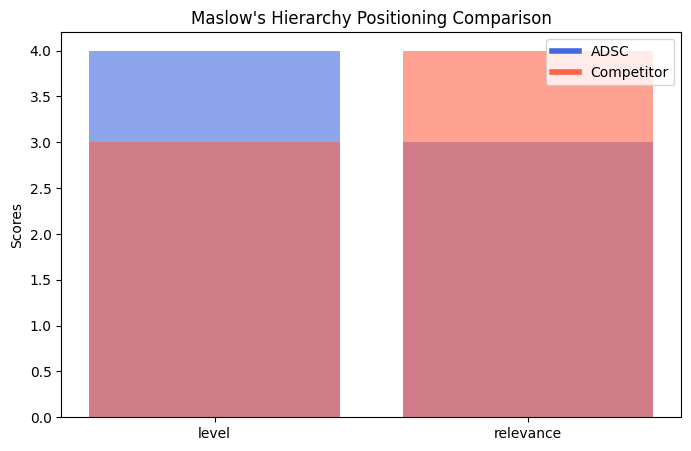

In [13]:
def plot_maslow_positioning(adsc_data, competitor_data, save_filename=None):
    attributes = ['level', 'relevance']
    adsc_values = [adsc_data[attr] for attr in attributes]
    competitor_values = [competitor_data[attr] for attr in attributes]

    # Define custom colors
    adsc_color = 'royalblue'
    competitor_color = 'tomato'

    plt.figure(figsize=(8, 5))
    plt.bar(attributes, adsc_values, label='ADSC', alpha=0.6, color=adsc_color)
    plt.bar(attributes, competitor_values, label='Competitor', alpha=0.6, color=competitor_color)

    plt.ylabel('Scores')
    plt.title("Maslow's Hierarchy Positioning Comparison")
    plt.legend()

    # Customize the legend with color patches
    custom_legend = [plt.Line2D([0], [0], color=adsc_color, lw=4),
                     plt.Line2D([0], [0], color=competitor_color, lw=4)]
    plt.legend(custom_legend, ['ADSC', 'Competitor'])

    if save_filename:
        # If a filename is provided, save the chart to disk
        plt.savefig(save_filename, bbox_inches='tight', dpi=300)

    plt.show()

# Specify a filename for saving the chart (e.g., 'maslow_positioning.png')
save_filename = 'maslow_positioning.png'
plot_maslow_positioning(adsc_maslow, competitor_maslow, save_filename)


In [6]:
from loguru import logger
from lchop.context.task_context import register_task

import json
import time
from itertools import islice

from duckduckgo_search import DDGS

from utils.create_prompts import create_tailwind_landing
from utils.prompt_tools import batched_prompt_map

DUCKDUCKGO_MAX_ATTEMPTS = 3

async def web_search(query: str, num_results: int = 5) -> list[str]:
    """Return the results of a Google search

    Args:
        query (str): The search query.
        num_results (int): The number of results to return.

    Returns:
        str: The results of the search.
    """
    search_results = []
    attempts = 0

    while attempts < DUCKDUCKGO_MAX_ATTEMPTS:
        results = DDGS().text(query)

        search_results = list(islice(results, num_results))

        if search_results:
            break

        time.sleep(1)
        attempts += 1

    results = json.dumps(search_results, ensure_ascii=False, indent=4)
    return json.loads(safe_google_results(results))


def safe_google_results(results: str | list) -> str:
    """
        Return the results of a Google search in a safe format.

    Args:
        results (str | list): The search results.

    Returns:
        str: The results of the search.
    """
    if isinstance(results, list):
        safe_message = json.dumps(
            [result.encode("utf-8", "ignore").decode("utf-8") for result in results]
        )
    else:
        safe_message = results.encode("utf-8", "ignore").decode("utf-8")
    return safe_message

competitors = await web_search("List of Ethical Competitive Intelligence Services", num_results=25)

companies = await batched_prompt_map(prompts_iterable=competitors, base_prompt="Return intelligence service company name or None:\n")

companies = [company for company in companies if company != 'None']
companies

{'title': 'Ethical Intelligence - Competitive & Market Intelligence Ethics - SCIP', 'href': 'https://www.scip.org/page/Ethical-Intelligence', 'body': 'Our Code of Ethics is the industry standard set of guidelines for ethical behavior for competitive and market intelligence activities. We expect our members, partners, staff, and the entire community to adhere to the Code, without exception. The Code is not a corporate policy; it contains guidelines by which companies and practitioners can set their own standards along the ethical spectrum.'}
{'title': 'Ethical Competitive Intelligence: A Complete Guide', 'href': 'https://www.watchmycompetitor.com/resources/ethical-competitive-intelligence-a-complete-guide/', 'body': "Ethical competitive intelligence is crucial because it safeguards a company against legal repercussions, preserves its reputation, builds trust with stakeholders, and promotes a culture of integrity. Unethical practices not only harm a company's reputation but can also lead

['SCIP',
 'Crayon',
 'Aqute Intelligence',
 'ArchIntel™',
 'Richter & Company',
 'SCIP',
 'SIS International Research',
 'One Strategy',
 'Competitive Intelligence Alliance',
 'BioPharmaVantage',
 'SIS International Research',
 'Cascade Insights']

In [7]:
from utils.create_primatives import create_python_primitive
from time import sleep
from utils.complete import acreate
from utils.create_prompts import create_data, spr
from loguru import logger

company_research = {}

analysis = ADSCAnalysis()

for company in companies:
    prompt = f"What is the annual revenue of {company}?"
    results = await web_search(f"site=owler.com {prompt}", num_results=10)
    company_research[company] = results
    revenue_prompt = f"""You are a competitive intelligence expert.
    What is the estimated annual revenue of the company. Provide your best estimate.
    {prompt}
    {list(results)}
    My estimate is:"""
    revenue = await acreate(prompt=revenue_prompt)
    revenue_int = await create_python_primitive(prompt=revenue, primitive_type=int)

    total_companies = 0

    if revenue_int < 50000000 and "Alliance" not in company and total_companies < 5:
        exe_prompt = f"""
        You are a Executive Summary for Competitive Analysis. Please provide a executive summary of {company_research[company]} so that we can do a SWOT analysis, VRIO analysis, and Maslow's Hierarchy of Needs analysis. Do not reference Owler, it is not relevant. Exclude any data referring to owler.

        Executive Summary of {company}:
        """
        summary = await acreate(prompt=exe_prompt, max_tokens=500)
        swot = await create_data(summary, SWOTAnalysis)
        vrio = await create_data(summary, VRIO)
        maslow = await create_data(summary, MaslowsHierarchyPositioning)
        cmp = Company(name=company, swot=SWOTAnalysis(**swot), vrio=VRIO(**vrio), maslow_position=MaslowsHierarchyPositioning(**maslow))

        analysis.competitors.append(cmp)
        total_companies += 1

# clip the dict to just 5 companies
company_research = dict(list(company_research.items())[:5])


{'title': "Strategic & Competitive Intelligence Professionals's ... - Owler", 'href': 'https://www.owler.com/company/scip', 'body': "Strategic & Competitive Intelligence Professionals's Profile, Revenue and Employees. SCIP is a Texas-based business community that focuses on strategic intelligence, research decision-support tools, processes and analytical capabilities for businesses. Strategic & Competitive Intelligence Professionals's primary competitors include Comintelli, Academyci, Asisonline and 5 more."}
{'title': 'Scip Competitors and Alternatives - Owler', 'href': 'https://www.owler.com/company/specificationsconsultantsinindependentpractice/competitors', 'body': "Scip's top competitors include Twc Contracting and Moore Staging 4 U. See the full list of Scip alternatives and competitive updates on Owler, the world's largest community-based business insights platform."}
{'title': 'Owler Revenue: Annual, Quarterly, and Historic - Zippia', 'href': 'https://www.zippia.com/owler-caree

In [10]:
analysis

ADSCAnalysis(competitors=[Company(name='SCIP', swot=SWOTAnalysis(strengths=['expertise in strategic intelligence', 'ability to provide customized solutions', 'strong network of professionals and experts'], weaknesses=['increasing competition', 'need to constantly innovate and adapt', 'relatively small team of 88 employees'], opportunities=['expand services to new markets and industries', 'develop new products and tools', 'leverage strong network and reputation for partnerships'], threats=['competition in the market', 'changing market conditions']), vrio=VRIO(value='Expertise in strategic intelligence and customized solutions', rarity='Strong network of professionals and experts', imitability='Constant innovation and adaptation', organization='Small team of 88 employees'), maslow_position=MaslowsHierarchyPositioning(level='Esteem', relevance="SCIP's key strengths lie in its expertise in strategic intelligence and its ability to provide customized solutions for its clients.")), Company(n

NameError: name 'company_revenue_dict' is not defined

In [ ]:
from adsc.models import *